In [39]:
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans




In [40]:
X, y = make_blobs(n_samples=500, centers=20, random_state=999)
print(f'X: {X[0]}\nX0: {X[:1,0]} \nX1: {X[:1,1]}')


X: [-5.2620148  -0.24728593]
X0: [-5.2620148] 
X1: [-0.24728593]


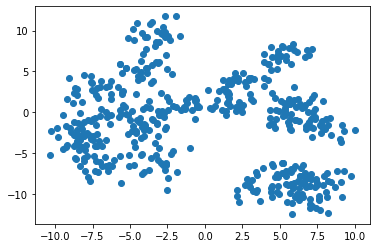

In [41]:
plt.scatter(X[:,0], X[:,1])

In [42]:

def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
        print(f'distance {i} - {numerator/denominator:.2f}')
    return distances.index(max(distances)) + 1



In [43]:

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    # print(f'n_clusters: {i} | centroid: {centroids}')
    print(f'kmeans.inertia_: {i:2} - {kmeans.inertia_:8.2f}')
    wcss.append(kmeans.inertia_)

n = optimal_number_of_clusters(wcss)
print(n)

kmeans.inertia_:  1 - 31547.37
kmeans.inertia_:  2 - 16949.21
kmeans.inertia_:  3 -  9464.85
kmeans.inertia_:  4 -  6005.10
kmeans.inertia_:  5 -  4717.40
kmeans.inertia_:  6 -  3662.64
kmeans.inertia_:  7 -  2974.80
kmeans.inertia_:  8 -  2498.78
kmeans.inertia_:  9 -  2050.78
kmeans.inertia_: 10 -  1843.37
kmeans.inertia_: 11 -  1648.72
kmeans.inertia_: 12 -  1474.95
kmeans.inertia_: 13 -  1331.85
kmeans.inertia_: 14 -  1161.19
kmeans.inertia_: 15 -  1061.45
kmeans.inertia_: 16 -   998.02
kmeans.inertia_: 17 -   904.41
kmeans.inertia_: 18 -   839.60
kmeans.inertia_: 19 -   786.35
distance 0 - 0.00
distance 1 - 7.54
distance 2 - 10.92
distance 3 - 11.95
distance 4 - 11.70
distance 5 - 11.32
distance 6 - 10.72
distance 7 - 10.00
distance 8 - 9.26
distance 9 - 8.38
distance 10 - 7.50
distance 11 - 6.60
distance 12 - 5.68
distance 13 - 4.78
distance 14 - 3.84
distance 15 - 2.88
distance 16 - 1.93
distance 17 - 0.97
distance 18 - 0.00
4


WCSS: 1 - 31547.372471390474
WCSS: 2 - 16949.21447214791
WCSS: 3 - 9464.847250570498
WCSS: 4 - 6005.101775346185
WCSS: 5 - 4717.404091931213
WCSS: 6 - 3667.860593372461
WCSS: 7 - 2974.7988616060024
WCSS: 8 - 2487.83959663886
WCSS: 9 - 2050.349341395183
WCSS: 10 - 1841.8381644426445
WCSS: 11 - 1661.6658419588075
WCSS: 12 - 1475.4125696750093
WCSS: 13 - 1356.0110298963955
WCSS: 14 - 1167.790648937677
WCSS: 15 - 1060.5031597583259
WCSS: 16 - 989.4254075819402
WCSS: 17 - 910.0149001716642
WCSS: 18 - 866.0105029952311
WCSS: 19 - 794.5993700557891


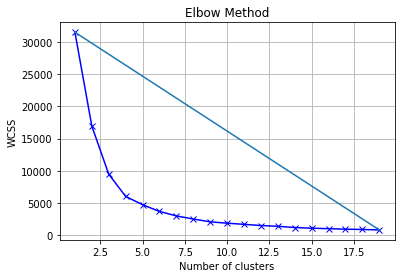

In [47]:

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(f'WCSS: {i} - {kmeans.inertia_}')
plt.plot(range(1, 20), wcss,'bx-')
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()
